In [72]:
import numpy as np
import pandas as pd
import re
import sklearn
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
train_news=pd.read_csv("train.csv")

In [15]:
train_news

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [16]:
train_news.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [17]:
train_news.fillna('',inplace=True)

In [18]:
train_news.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [19]:
train_news['combined']=train_news['author']+train_news['title']

In [ ]:
train_news['combined']

In [20]:
input_data=train_news.drop(columns=['label'],axis=1)
target=train_news['label']

### Performing Stemming 
#### It is the process of reducing a word to its root word

In [23]:
pstem=PorterStemmer()

In [30]:
def stemming(text):
    stemmed_info=re.sub('[^a-zA-Z]',' ',text)
    stemmed_info=stemmed_info.lower()
    stemmed_info=stemmed_info.split()
    stemmed_info=[pstem.stem(word) for word in stemmed_info if word not in stopwords.words('english')]
    stemmed_info=' '.join(stemmed_info)
    return stemmed_info

In [31]:
train_news['combined']=train_news['combined'].apply(stemming)

In [32]:
train_news['combined']

0        darrel lucushous dem aid even see comey letter...
1        daniel j flynnflynn hillari clinton big woman ...
2                consortiumnew comwhi truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoyiranian woman jail fiction unpub...
                               ...                        
20795    jerom hudsonrapp trump poster child white supr...
20796    benjamin hoffmann f l playoff schedul matchup ...
20797    michael j de la merc rachel abramsmaci said re...
20798    alex ansarynato russia hold parallel exercis b...
20799                        david swansonwhat keep f aliv
Name: combined, Length: 20800, dtype: object

In [34]:
x=train_news['combined']

In [46]:
train_news['combined'][0]

'darrel lucushous dem aid even see comey letter jason chaffetz tweet'

In [42]:
y=train_news['label']

In [36]:
b=train_news['combined'].values

In [43]:
vect=TfidfVectorizer()
vect.fit(x)
x=vect.transform(x)

In [61]:
print(x)

  (0, 26340)	0.28088379401596425
  (0, 22724)	0.2552336018069161
  (0, 15019)	0.43006226759639316
  (0, 14555)	0.29177259684200296
  (0, 12782)	0.24619727512767195
  (0, 8022)	0.23133661742488731
  (0, 6273)	0.2839932825877813
  (0, 5969)	0.35488202138141456
  (0, 5006)	0.2472595823572816
  (0, 4211)	0.3625320323150658
  (0, 578)	0.2694167078545385
  (1, 27923)	0.36911845953845024
  (1, 11313)	0.24166773097712638
  (1, 8772)	0.5258635625386451
  (1, 5916)	0.31810058109638056
  (1, 4767)	0.23338756776626793
  (1, 3859)	0.45980466668763476
  (1, 3281)	0.18652439327549428
  (1, 2622)	0.3562953366945267
  (2, 26235)	0.3665032495181434
  (2, 16361)	0.43295215406038445
  (2, 9454)	0.30743020569262086
  (2, 8567)	0.3411947414020896
  (2, 5240)	0.40440534260277944
  (2, 5121)	0.5511414848555652
  :	:
  (20797, 25776)	0.08220218573989037
  (20797, 25319)	0.3119640221826561
  (20797, 22086)	0.24902354987792552
  (20797, 20778)	0.2729578683228216
  (20797, 20493)	0.249994989010826
  (20797, 17505

### Splitting the dataset

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,stratify=y,random_state=3)

In [51]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

### Checking accuracy

In [66]:
prediction=model.predict(x_test)

In [67]:
accuracy=accuracy_score(prediction,y_test)
accuracy

0.9557692307692308

### Calculating Precision and Recall

In [68]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2077
           1       0.93      0.99      0.96      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



### Plotting Confusion Matrix

Text(33.0, 0.5, 'Truth')

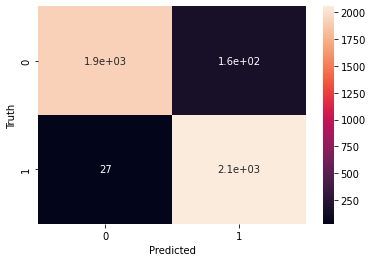

In [73]:
cf=confusion_matrix(y_test,prediction)
sns.heatmap(cf,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')